#Importing the dependencies and generating the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from sklearn.datasets import make_circles

In [3]:
x, y = make_circles(n_samples = 250, noise = 0.05, random_state = 42)

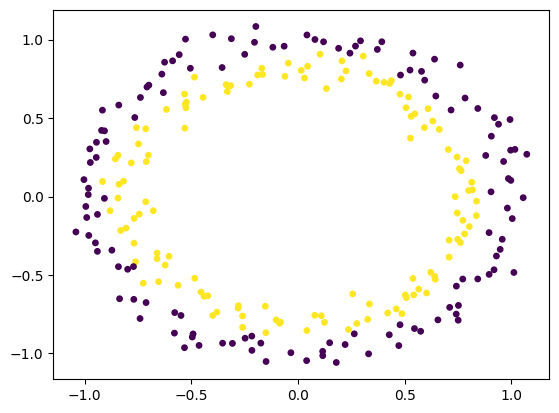

In [8]:
plt.scatter(x[:,0], x[:,1], c = y, s = 15)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# ANN

In [10]:
ann = Sequential()

ann.add(Dense(units = 256, activation = 'relu', input_dim = 2))
ann.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = ann.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3500, verbose = 0)

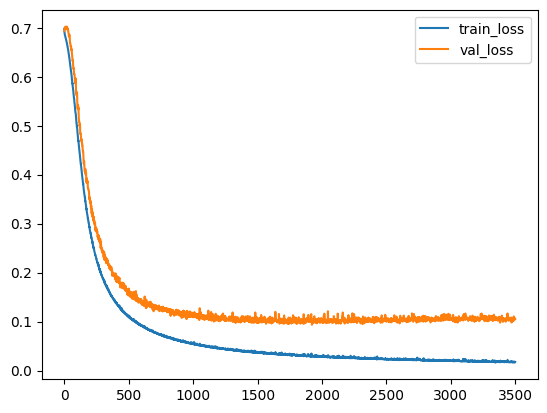

In [14]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [15]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

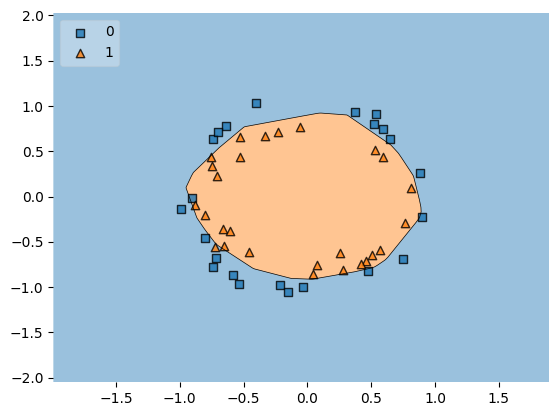

In [16]:
plot_decision_regions(x_test, y_test, clf = ann, legend = 2)

#Early Stopping

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
ann = Sequential()

ann.add(Dense(units = 256, activation = 'relu', input_dim = 2))
ann.add(Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [22]:
history = ann.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4695 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4516 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5052 - loss: 0.6891 - val_accuracy: 0.4600 - val_loss: 0.6950
Epoch 4/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5067 - loss: 0.6891 - val_accuracy: 0.4600 - val_loss: 0.6971
Epoch 5/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5093 - loss: 0.6868 - val_accuracy: 0.4600 - val_loss: 0.6974
Epoch 6/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5082 - loss: 0.6866 - val_accuracy: 0.4600 - val_loss: 0.6976
Epoch 7/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5156 - loss: 0.6847 - val_accuracy: 0.4600 - val_loss: 0.6983
Epoch 8/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5199 - loss: 0.6822 - val_accuracy: 0.4600 - val_loss

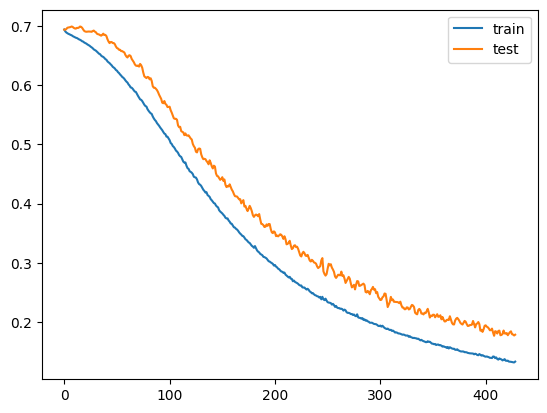

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


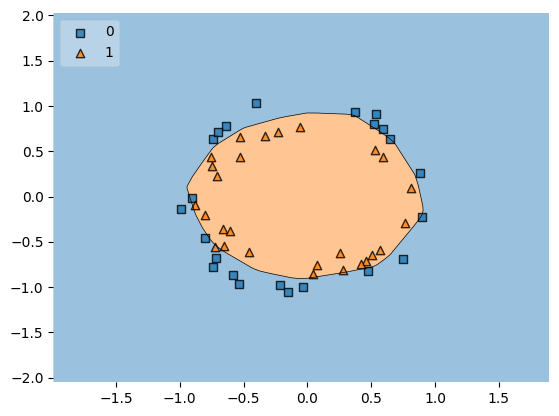

In [25]:
plot_decision_regions(x_test, y_test.ravel(), clf = ann, legend=2)
plt.show()